In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_data = pd.read_csv('./dataset/ipl/matches.csv')
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
match_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [5]:
match_data[match_data['winner'].isnull()].index.tolist()

[300, 545, 570, 744]

In [6]:
match_data[match_data['result']=='tie']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
705,11146,2019,Delhi,30/03/19,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon,Marais Erasmus
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore


In [7]:
match_data[match_data['result']=='no result']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [8]:
print('Rows: {}, Columns: {}'.format(match_data.shape[0], match_data.shape[1]))

Rows: 756, Columns: 18


In [9]:
print('-----Gathering extra information-----')

seasons = sorted(match_data['season'].unique())
print('Seasons: {}, count: {}'.format(seasons, len(seasons)))

print('Result: {}'.format(match_data['result'].unique()))
print('Toss decision: {}'.format(match_data['toss_decision'].unique()))
print('DL applied: {}'.format(match_data['dl_applied'].unique()))

teams = pd.concat([match_data['team1'],match_data['team2']]).unique()
print('Teams: {}, count: {}'.format(teams, len(teams)))

-----Gathering extra information-----
Seasons: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], count: 12
Result: ['normal' 'tie' 'no result']
Toss decision: ['field' 'bat']
DL applied: [0 1]
Teams: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals'], count: 15


In [10]:
match_data['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [11]:
# INCONSISTENT DATA

# 'Rising Pune Supergiant === Rising Pune Supergiants
modified = match_data.replace('Rising Pune Supergiant', 'Rising Pune Supergiants', inplace = True)
teams = pd.concat([match_data['team1'],match_data['team2']]).unique()
print('Teams: {}, count: {}'.format(teams, len(teams)))


# Bengaluru === Bangalore
match_data.replace('Bangalore','Bengaluru', inplace=True)
print('Cities: ',match_data['city'].unique())

Teams: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Delhi Capitals'], count: 14
Cities:  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bengaluru' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali']


#### COMBINE TEAMS ??

In [12]:
# TOSS WINNER OVER EACH SEASON
def get_toss_wins_for_season(season: int):
    toss_wins = {}
    subset = match_data.loc[match_data['season']==season]
    for team in subset['toss_winner']:
        if team not in toss_wins:
            toss_wins[team] = 0
        toss_wins[team] += 1
    
#     keys = list(toss_wins.keys()) 
#     values = [toss_wins[i] for i in keys] 
#     ax = sns.barplot(x=keys, y= values)
#     ax.tick_params(axis='x', rotation=90)
    return toss_wins

    
season_wise_data = {}
for i in seasons:
    season_wise_data[i] = get_toss_wins_for_season(i)

df = pd.DataFrame(season_wise_data).fillna(0)
print(df.head())

                             2008  2009  2010  2011  2012  2013  2014  2015  \
Royal Challengers Bangalore   5.0   8.0   6.0   6.0   6.0   5.0   9.0  10.0   
Chennai Super Kings           5.0   7.0  10.0   9.0   7.0   8.0  10.0  10.0   
Rajasthan Royals             11.0   4.0   6.0   7.0  10.0  11.0   8.0   6.0   
Mumbai Indians                8.0   6.0   9.0   6.0  11.0  12.0   6.0   7.0   
Deccan Chargers               9.0  10.0   9.0   6.0   9.0   0.0   0.0   0.0   

                             2016  2017  2018  2019  
Royal Challengers Bangalore   6.0   9.0   7.0   4.0  
Chennai Super Kings           0.0   0.0  11.0  12.0  
Rajasthan Royals              0.0   0.0   6.0  11.0  
Mumbai Indians                9.0  11.0   5.0   8.0  
Deccan Chargers               0.0   0.0   0.0   0.0  


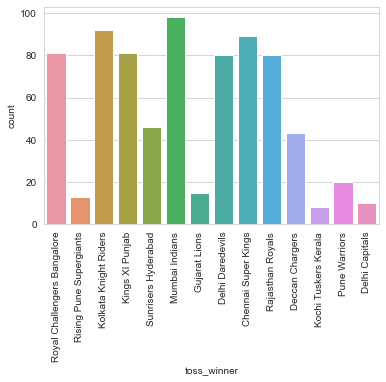

In [13]:
# TOSS WINNER OVER ALL SEASONS
sns.set_style("whitegrid")
ax = sns.countplot(x='toss_winner', data=match_data)
ax.tick_params(axis='x', rotation=90)

<AxesSubplot:xlabel='season', ylabel='win_by_runs'>

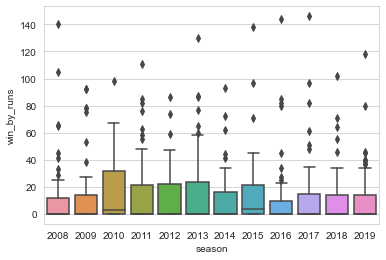

In [14]:
# sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x='season',y='win_by_runs', data=match_data)

In [15]:
def get_win_by(team: str, param: str):
    subset = match_data.loc[(match_data['winner']==team) & (match_data[param]!=0)]
    sns.stripplot(x='season',y=param, data=subset).set(title = team)
    plt.show(sns)

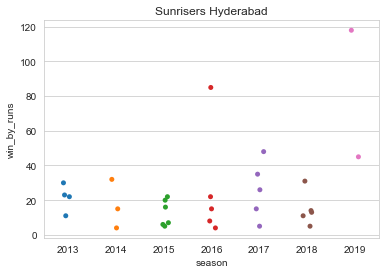

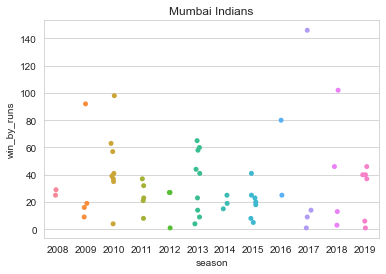

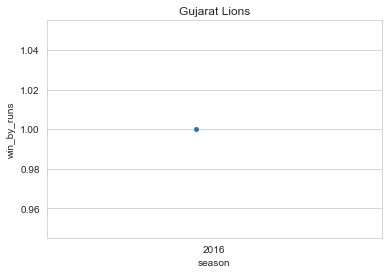

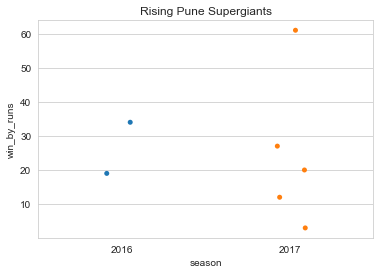

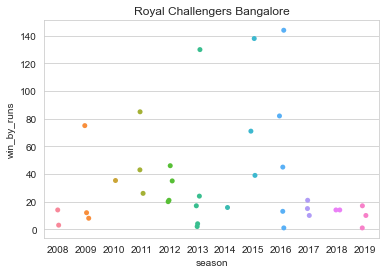

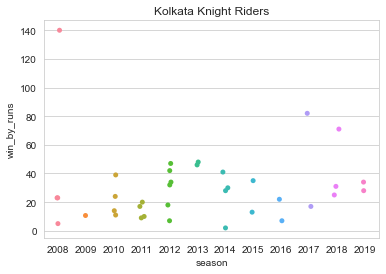

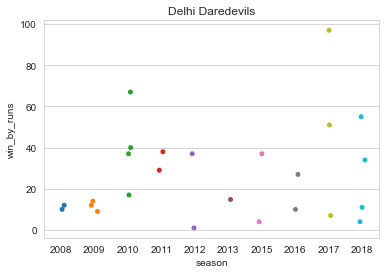

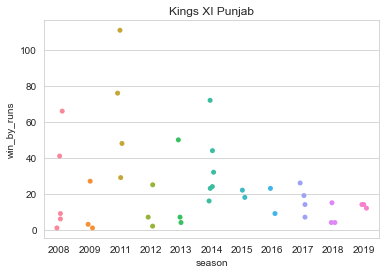

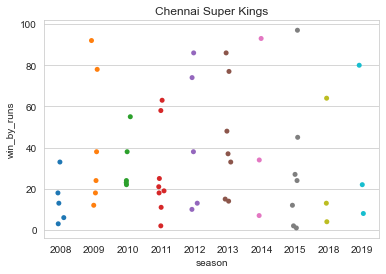

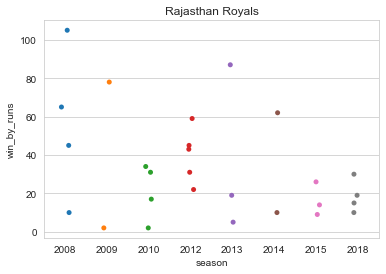

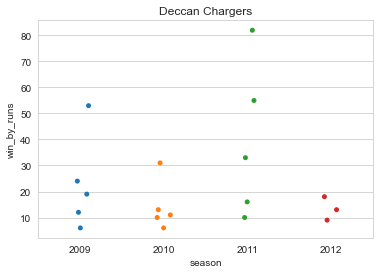

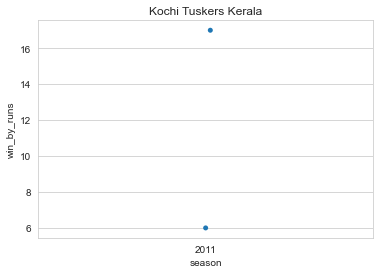

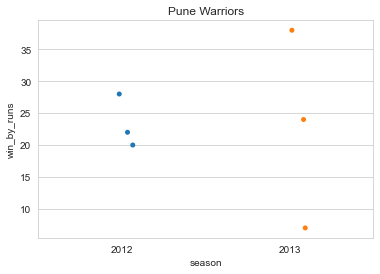

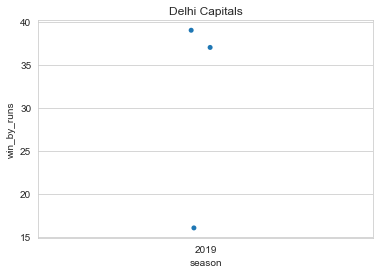

In [16]:
for i in teams:
    get_win_by(i, 'win_by_runs')

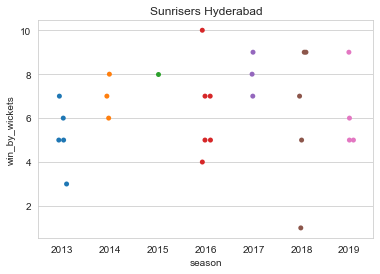

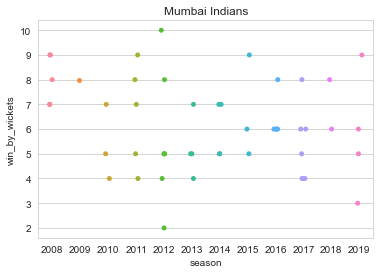

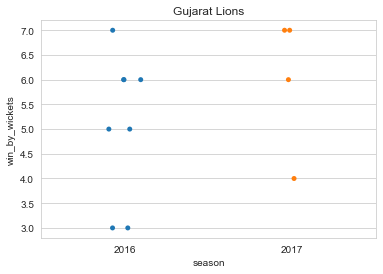

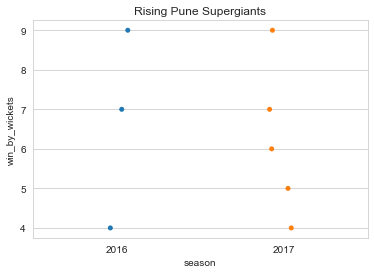

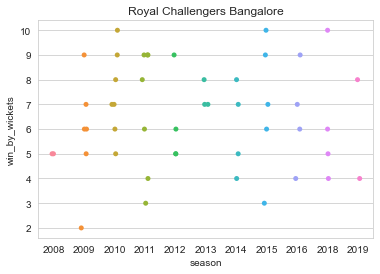

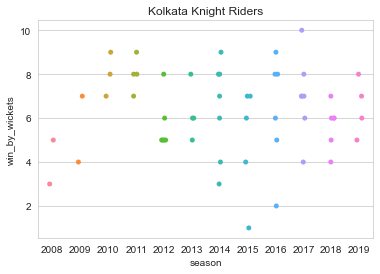

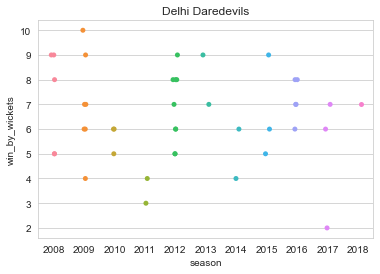

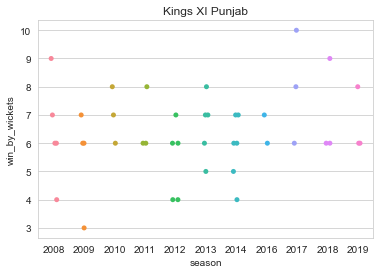

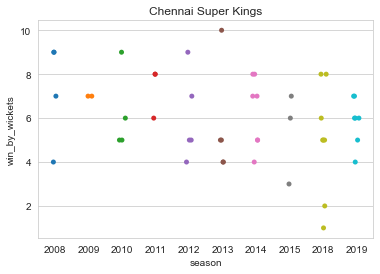

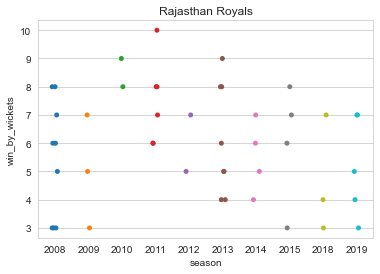

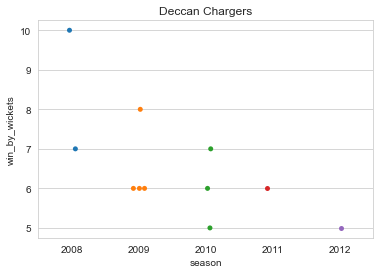

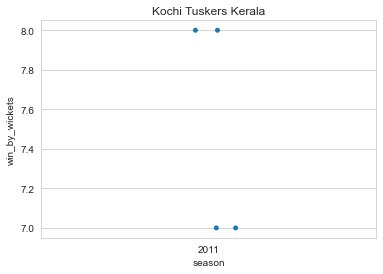

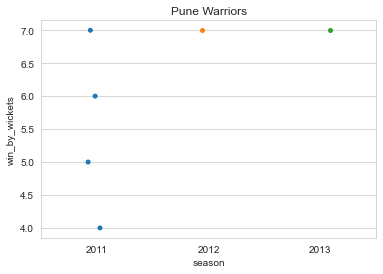

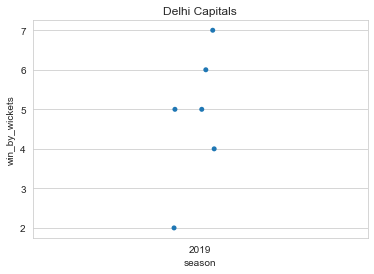

In [17]:
for i in teams:
    get_win_by(i, 'win_by_wickets')

Number of matches where the toss winner won the match: 393
Number of matches where the toss winner who chose to field won the match: 259
Number of matches where the toss winner who chose to bat won the match: 134


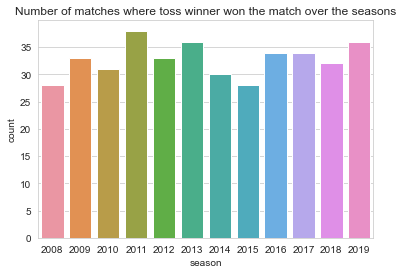

In [18]:
group = match_data.groupby(['winner'])

toss_match = match_data[match_data['toss_winner'] == match_data['winner']]
toss_field = (toss_match[toss_match['toss_decision'] == 'field'])
toss_bat = (toss_match[toss_match['toss_decision'] == 'bat'])

print('Number of matches where the toss winner won the match: {}'.format(toss_match.shape[0]))
print('Number of matches where the toss winner who chose to field won the match: {}'.format(toss_field.shape[0]))
print('Number of matches where the toss winner who chose to bat won the match: {}'.format(toss_bat.shape[0]))

ax = sns.countplot(x='season',data=toss_match).set(title = 'Number of matches where toss winner won the match over the seasons')

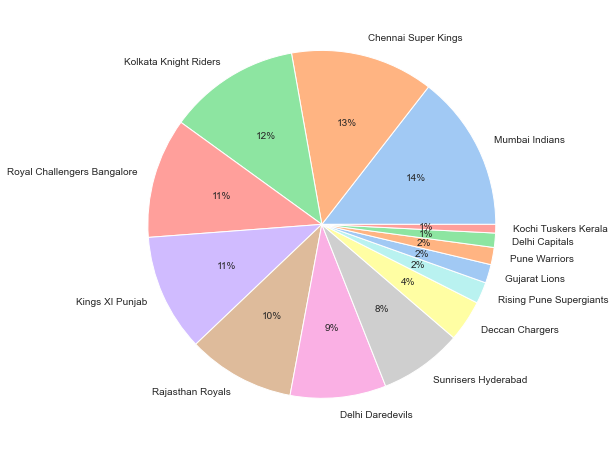

In [19]:
# Number of matches won by each team

won = dict(match_data['winner'].value_counts())
labels = list(won.keys())
data = [won[i] for i in labels]
colors = sns.color_palette('pastel')[:len(data)]
plt.figure(figsize=(12,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

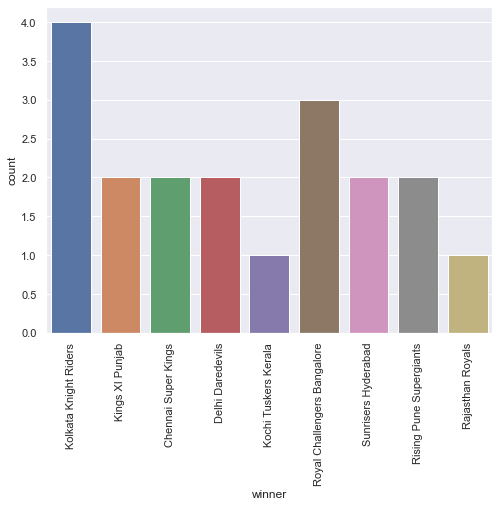

In [20]:
# Wins by DL method

subset = match_data[match_data['dl_applied'] == 1]
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.countplot(x='winner', data=subset)
ax.tick_params(axis='x', rotation=90)

In [21]:
match_data['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [22]:
match_data['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Delhi Capitals'], dtype=object)

In [23]:
(match_data['winner'] == 'Sunrisers Hyderabad').sum()

58

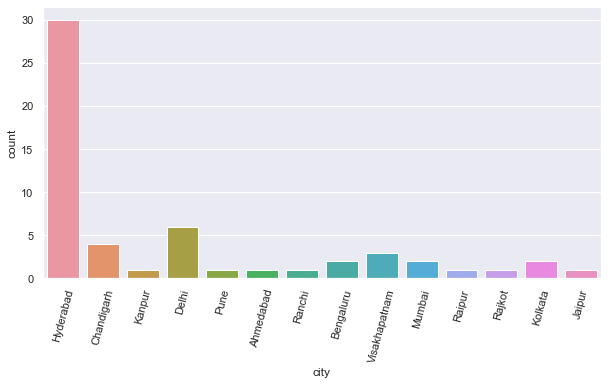

In [24]:
# RCB Wins in each location

rcb_wins = match_data[match_data['winner'] == 'Sunrisers Hyderabad']
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(x='city', data=rcb_wins)
ax.tick_params(axis='x', rotation=75)

***All teams have exceptional performance in home ground!***

In [25]:
# Highest win margin

In [26]:
# Wins of each team
def get_wins(team: str):
    total_matches_played = match_data[(match_data['team1']==team) | (match_data['team2'] == team)]
    matches_won = (total_matches_played['winner'] == team).sum()
    
    return matches_won, total_matches_played.shape[0]

In [27]:
wins = {}
for team in teams:
    wins[team] = get_wins(team)

for team in wins:
    print('{} has won \033[1m{} matches out of {}\033[0m , Win ratio: {:.2f}'.format(team, wins[team][0], wins[team][1],wins[team][0]/wins[team][1]))

Sunrisers Hyderabad has won 58 matches out of 108 , Win ratio: 0.54
Mumbai Indians has won 109 matches out of 187 , Win ratio: 0.58
Gujarat Lions has won 13 matches out of 30 , Win ratio: 0.43
Rising Pune Supergiants has won 15 matches out of 30 , Win ratio: 0.50
Royal Challengers Bangalore has won 84 matches out of 180 , Win ratio: 0.47
Kolkata Knight Riders has won 92 matches out of 178 , Win ratio: 0.52
Delhi Daredevils has won 67 matches out of 161 , Win ratio: 0.42
Kings XI Punjab has won 82 matches out of 176 , Win ratio: 0.47
Chennai Super Kings has won 100 matches out of 164 , Win ratio: 0.61
Rajasthan Royals has won 75 matches out of 147 , Win ratio: 0.51
Deccan Chargers has won 29 matches out of 75 , Win ratio: 0.39
Kochi Tuskers Kerala has won 6 matches out of 14 , Win ratio: 0.43
Pune Warriors has won 12 matches out of 46 , Win ratio: 0.26
Delhi Capitals has won 10 matches out of 16 , Win ratio: 0.62


In [28]:
# BEST NON-HOME GROUND PERFORMANCE

In [29]:
# Venue

In [30]:
# CSK vs RCB

In [31]:
# match_data['id'].unique()